In [ ]:
from cs103 import *



# CPSC 103 - Systematic Program Design
# Module 05b Day 1
Ian Mitchell, with thanks to Rik Blok and Giulia Toti

---

# Reminders
- **Today-Tomorrow**: Module 5 Week 2 Tutorial Attendance
- Wed: Module 4 (Compound): Tutorial Resubmission (optional)
- next Wed-Fri: Office hours in tutorials (no attendance taken)
- next Fri: Midterm exam scheduled for Friday Oct 27 @ 6:30pm

See your Canvas calendar (https://canvas.ubc.ca/calendar) for details.

---

<div style="float:right; width:40%">
    
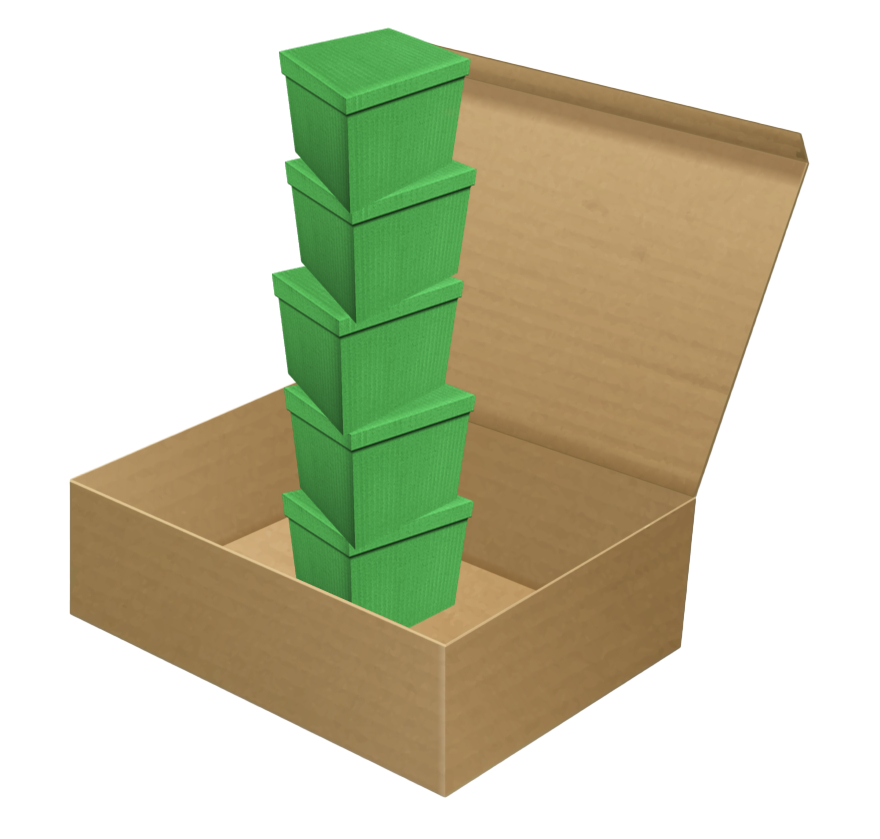

</div>

<div style="float:left; width:60%">
    
# Arbitrary-size data continued

What are some examples of information that would be well-represented as arbitrary-sized data?

<details class="alert alert-success"><summary style="cursor:pointer; display:list-item">✅ An arbitrary-sized data type is good for... (Don't peek if you want to learn 🙂)</summary>
    
- groups of data that are of identical type, and
- may have different numbers of items in them.
    
</details>

---
    
</div>

# Recap: Applying the HtDD recipe to lists

### Data definition
- Can name (e.g., `ListOfDataType = List[DataType]`) but usually redundant
- Instead we often just add a comment that our new data type is a 
```python
# List[DataType]
```

### Interpretation
- This suffices:
```python
# interp. a list of DataType
```
- Can add more information if you know more about the data being stored
- But don't need to interpret the data type in the list... user can review its interp. statement

### Examples
- Always consider the possibility that the list could be empty, `[]`.
- Naming convention: abbreviation of `List[DataType]` is `LODT` (for "list of data type")

### Template
- function and parameter naming also from "list of data type":
```python
@typecheck
# template based on arbitrary-sized
def fn_for_lodt(lodt: List[DataType]) -> ...:
```
- accumulator variable (`acc`) helps us keeps track of something interesting we're looking at in the list:
```python
    # description of the accumulator
    acc = ...   # type: ...
```
- `for` loop iterates through all items in the list, performing the function's task
- update accumulator as we progress:
```python
    for dt in lodt:
        acc = ...(dt, acc)
```
- return something that depends on the final data stored in the accumulator
```python
    return ...(acc)
```

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Appending to a list

<div style="width: 100%; display: flex; justify-content: space-between;">

<div style="float: left; width: 50%">

The [Python Language Reference](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists) tells us how to append (add to the end) items to an existing list:
    
1. We can join two lists with the `+` operator, or
2. We can append a single item with the `.append` method.

What is the final value of `los` after the program to the right has executed?

</div><div style="float: right; width: 40%">

```python
los = ['one', 'two']
item3 = 'three'
item4 = 'four'

los = los + [item3]
los.append(item3)
```
    
</div></div>

  A. ```['three', 'four']```  
  B. ```['one', 'two', 'three']```  
  C. ```['one', 'two', 'three', 'three']```  
  D. ```['one', 'two', 'three', 'four']```  
  E. The program won't complete because it contains an error  

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>
    
Remember, `+` joins two *lists*.  In which cases do we need to assign the result to a variable?
    
</details>

---

# Arbitrary-Sized Data (Lists) of Compounds

### Compound data: 
- Use when the information to be represented has two or more values that naturally belong together.  E.g.,
```python
V1 = Velocity(9, 22)
```

### Arbitrary sized data (List):
- A data type that has a group of elements of the same type
- It is very natural to want to create a list of compound data!  E.g., 
```python
List[Velocity]
```
- When creating examples, include some that use the compound's examples.  E.g.,
```python
LOV2 = [V1, V2]
```
- You also must use the Compound data template in the list template (reference rule) as we'll demonstrate below

---

# Concepts covered

When data definitions contain other data definitions we need multiple functions to handle them.  Adds a new "tier" of complexity to the course.

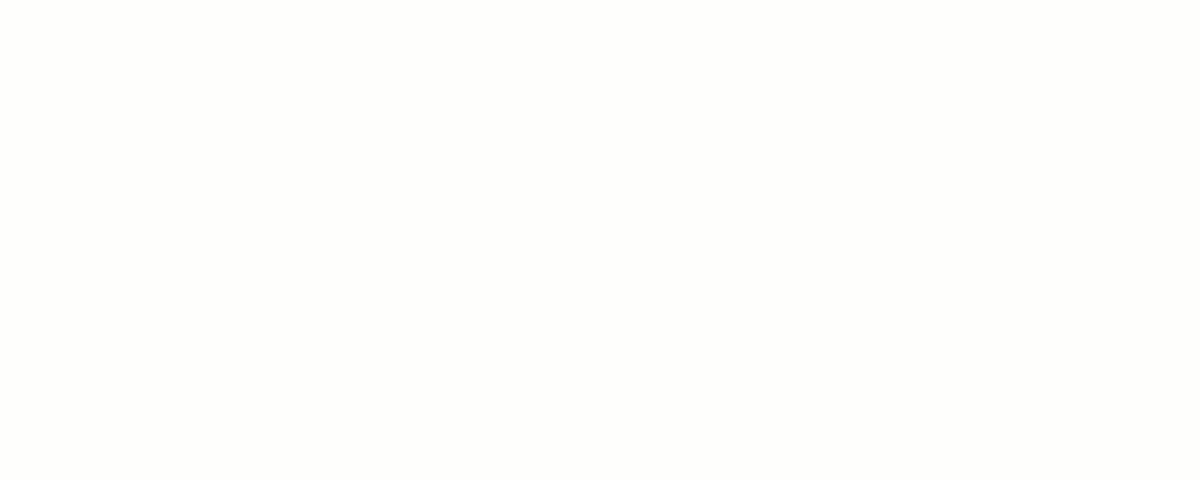

---

# The reference rule

<div class="alert alert-info">
    
**ℹ️ Reference rule:** When a data definition **refers** to other non-primitive data, delegate the operation to a helper function.

</div>

- Must be applied **every** time a data definition manipulates other data that is not primitive
- That includes List, Compound, Enumerated, and Optional types
- Anytime a variable is from a non-primitive type, we should invoke its template function.  E.g., if `dt` is non-primitive then
```python
    # replace
    return ...(dt)
    # with
    return ...(fn_for_data_type(dt))
```
- Add a comment to indicate the reference rule was applied:
```python
    # template based on ... and reference rule
```

---

<div style="float:right; width:30%">
    
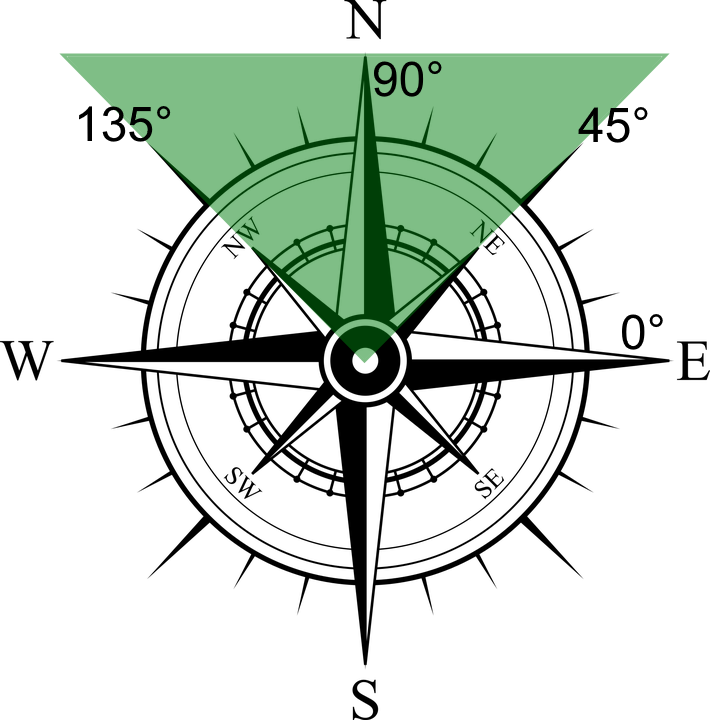

</div>

# Example 1: Reference rule

**Problem:** Given the compound data `Velocity`, write a function to compute the average speed of all velocities with a *northerly* heading in a list. We will consider directions in the range 45-135 degrees as northerly.
    
We'll need to tackle this problem in three stages:
1. Review the given `Velocity` data definition
2. Design a data definition for `List[Velocity]`
3. Design our function and any needed "helper" functions

---


    
# Stage 1: Review the given `Velocity` data definition

Recall our `Velocity` compound from Module 04 Day 1:

In [ ]:
from typing import NamedTuple 
Velocity = NamedTuple('Velocity', [('speed', float), 
                                   ('dir', int)]) # in range[0,359] 

# interp. a velocity with its speed in m/s and direction 
# as an angle in degrees with east=0 increasing counterclockwise 

V1 = Velocity(9, 22) 
V2 = Velocity(3.4, 180) 

# template based on Compound (2 fields)
@typecheck 
def fn_for_velocity(v: Velocity) -> ...: 
    return ...(v.speed, v.dir) 



# Stage 2: Design a data definition for `List[Velocity]`

The **D**efinition, **I**nterpretation, **E**xamples, and our **usual** **T**emplate have already been completed.  We still need to apply the reference rule.

In [ ]:
from typing import List 
# List[Velocity] 
# interp. a list of velocities 

LOV0 = [] 
LOV1 = [Velocity(3.1, 41)] 
LOV2 = [V1, V2] 
LOV3 = [Velocity(5.9, 265), Velocity(3.5, 89), Velocity(7.9, 323)] 

@typecheck 
# template based on arbitrary-sized
def fn_for_lov(lov: List[Velocity]) -> ...: 
    # description of the accumulator 
    acc = ... # type: ... 
    for v in lov: 
        acc = ...(v, acc)
    return ...(acc) 



<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Where to apply the reference rule?

We need to make two changes to the code above to apply the reference rule.  Target either one of the places we'll need to change.

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Solution (For later.  Don't peek if you want to learn 🙂)</summary>
    
Notice that our `List` refers to the non-primitive data type `Velocity` so we had to apply the reference rule by delegating the operation to a helper function.  We made two changes to our template:
1. Called a helper function to work with the non-primitive variable `v`
```python
        acc = ...(fn_for_velocity(v), acc) 
```
2. Added a comment that we've applied the reference rule
```python
# template based on arbitrary-sized and reference rule 
```
    
```python
from typing import List 
# List[Velocity] 
# interp. a list of velocities 

LOV0 = [] 
LOV1 = [Velocity(3.1, 41)] 
LOV2 = [V1, V2] 
LOV3 = [Velocity(5.9, 265), Velocity(3.5, 89), Velocity(7.9, 323)] 

@typecheck 
# Template based on arbitrary-sized and reference rule
def fn_for_lov(lov: List[Velocity]) -> ...: 
    # description of the accumulator 
    acc = ... # type: ... 
    for v in lov: 
        acc = ...(fn_for_velocity(v), acc)
    return ...(acc) 

```
    
</details>

---

# Helper functions

- A *helper function* is a normal function, but instead of solving the main problem, it solves a small part of the problem, helping the main function to solve the problem
- The main function is the function that actually solves the problem and uses the helper function to achieve this
- A good design has several small helper functions that each do only a small task
- Every time the reference rule appears, it indicates that a helper function may be needed

### Example: Top-down design

The `main` function here doesn't know how to work with non-primitive data `dt1` and `dt2` so it **refers** them to helper functions.

```python
def main(dt1: DataType1, dt2: DataType2) -> ...:
    """
    The main function, which depends on two data types
    """
    return ...(fn_for_data_type_1(dt1), fn_for_data_type_2(dt2))
```

Notice we designed our `main` function **first** with calls to *helper function* stubs, then we design those helper functions **after**.

```python
def fn_for_data_type_1(dt1: DataType1) -> ...:
    """
    Helper function for DataType1
    """
    return ... # stub

def fn_for_data_type_2(dt2: DataType2) -> ...:
    """
    Helper function for DataType2
    """
    return ... # stub
```

<div class="alert alert-warning">
    
### ⚠️ Exception

No matter how easy the task is, you must use a helper... **except** if the helper function would just return the **argument itself** or a **single field** of the argument.  In those rare cases (**ONLY!**) you can access the argument or field directly, without calling a helper.

</div>

---

# Top-down vs. bottom-up approach

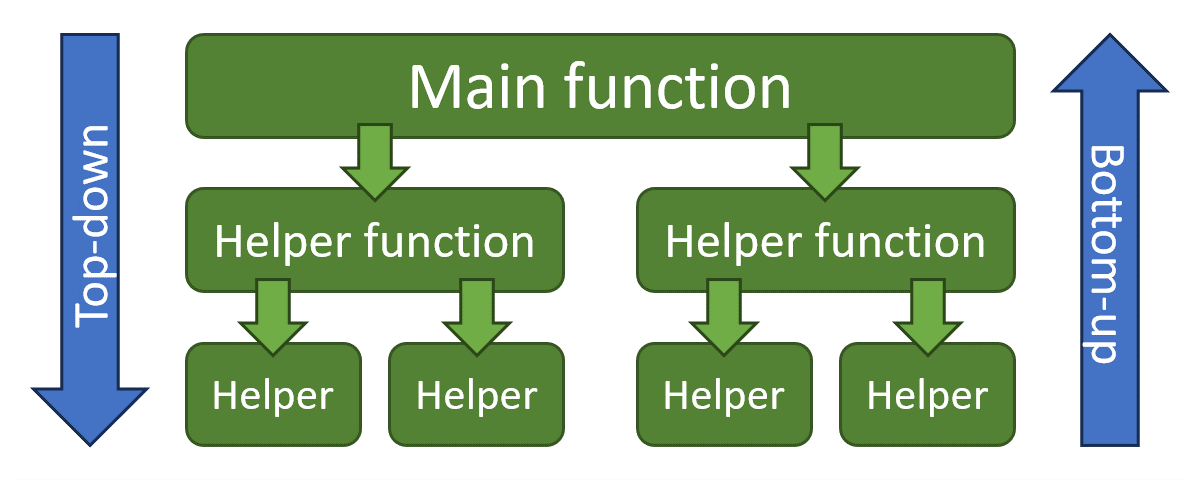

### Top-down
- "Divide and conquer" strategy
- Tackle the *high-level* problem first
- Design your main function
  - Make calls to new helper functions as needed
  - Write stubs for the new helper functions as you go
- Then design your helper functions to solve the *low-level* subproblems

### Bottom-up
- "Construction" strategy
- Tackle the *low-level* subproblems first
- Design helper functions to solve the subproblems
- Then design your main function – using the helper functions – to solve the *high-level* problem

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Top-down vs. bottom-up

Ultimately, the choice of whether to take a top-down or bottom-up approach depends on the problem and your preferences/experience. You can use a combination of both.

Which of the following are advantages of the **top-down** approach?  Select ALL that apply.

<ol style="list-style-type:upper-alpha">
    <li>Facilitates teamwork by allowing tasks to be identified, divided up, and worked on simultaneously</li>
    <li>Encourages focus on the big picture and long-term goals</li>
    <li>Allows testing as code is developing</li>
    <li>Helps to identify potential problems and solutions before implementation</li>
    <li>Lets you jump straight into programming, without having to plan a solution to the full problem</li>
</ol>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>
    
Recall, top-down starts by identifying the main goal and breaking it down into sub-problems until the solution is reached.  The program won't function correctly until all the sub-problem solutions have been implemented.
    
</details>


<div class="alert alert-warning">

⚠️ If your program spans multiple cells, **present** the code in a bottom-up style, with helper functions in cells **above** main program, **even if using top-down approach** (as we'll do in this lecture).  This presentation order is needed if you want the program to run correctly on kernel restart (so that the lower level helper functions are defined before they are called by the higher level functions).

</div>

---

# Decomposing the problem

**Problem:** Given the compound data `Velocity`, write a function to compute the average speed of all velocities with a northerly heading in a list.

### Let's take a top-down approach
- "Divide and conquer" strategy
- Tackle the *high-level* problem first

Design a function `average_speed_of_northerly` that takes in `List[Velocity]` and returns the average speed of the Velocities with a northerly direction

### Subproblems

What subproblems do we need to solve to complete our solution?

<details class="alert alert-success"><summary style="cursor:pointer; display:list-item">✅ Answer (Don't peek if you want to learn 🙂)</summary>

Q1: How to identify northerly-directed Velocity instances?</summary>

<details class="alert alert-success"><summary style="cursor:pointer; display:list-item">✅ Q1 Answer (Don't peek if you want to learn 🙂)</summary>
    
Check if their `dir` is in [45,135] degrees

</details>

Q2: How to compute the average speed of those Velocity instances?

<details class="alert alert-success"><summary style="cursor:pointer; display:list-item">✅ Q2 Answer (Don't peek if you want to learn 🙂)</summary>

- Count those Velocities and sum their speeds
- Then divide sum by count to get average
    
</details>

</details>


<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Helper functions

Our task is now to design a function that takes in a list of Velocities and returns the average speed of the Velocities with a northerly direction.

Using the top-down design approach outlined above, it will iterate through the list of Velocities accumulating the sum of speeds and count of all northerly-directed Velocities in the list seen so far.

What helper functions will we need?  Select ALL that apply. [Set iClicker question type to "Multiple Answer".]

<ol style="list-style-type:upper-alpha">
    <li>A function that returns the maximum speed in a list of Velocities</li>
    <li>A function that takes in a list of Velocities and returns the average speed of the Velocities with a northerly direction</li>
    <li>A function that reports the direction of a Velocity</li>
    <li>A function that reports whether a Velocity is northerly-directed</li>
    <li>A function that reports the speed of a Velocity</li>
</ol>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>
    
Think about what the function is trying to accomplish and what information it needs to do so. The function needs to calculate the average speed of Velocities with a northerly direction, which means that it needs to identify which Velocities have a northerly direction and compute their speeds. To do this, what will it need help with?
    
Notice that two of the options simply report the value of a field, so they fall under our "exception" and don't require helper functions.  
    
Depending on your solution approach, you might also need other helper functions; such as  
    - A function that reports the average speed of a list of Velocities.  
    - A function that returns a list of the Velocities that are northerly-directed in a list of Velocities.
    
</details>

---

# Decomposing the problem (version 2)

**Problem:** Given the compound data `Velocity`, write a function to compute the average speed of all velocities with a northerly heading in a list.

### What about a bottom-up approach?
- "Construction" strategy
- Tackle the *low-level* problem first

Design a function `average_speed_of_northerly` that takes in `List[Velocity]` and returns the average speed of the Velocities with a northerly direction

### Subproblems

What subproblems do we need to solve to complete our solution?

<details class="alert alert-success"><summary style="cursor:pointer; display:list-item">✅ Answer (Don't peek if you want to learn 🙂)</summary>

Q1: How to identify northerly-directed Velocities?

<details class="alert alert-success"><summary style="cursor:pointer; display:list-item">✅ Q1 Answer (Don't peek if you want to learn 🙂)</summary>
    
Check if their `dir` is in [45,135] degrees

</details>

Q2: How to get a list containing only the northerly-directed Velocity instances?

<details class="alert alert-success"><summary style="cursor:pointer; display:list-item">✅ Q2 Answer (Don't peek if you want to learn 🙂)</summary>
    
Create a new list containing only the Velocity instances which are northerly-directed.

</details>
    
Q3: How to compute the average speed of a list of Velocity instances?

<details class="alert alert-success"><summary style="cursor:pointer; display:list-item">✅ Q3 Answer (Don't peek if you want to learn 🙂)</summary>

- Count those Velocities and sum their speeds
- Then divide sum by count to get average
    
</details>

</details>

# Stage 3: Design our function and any needed "helper" functions

**Problem:** Given the compound data `Velocity`, write a function to compute the average speed of all velocities with a northerly heading in a list.

### Approach to solution

Design a function `average_speed_of_northerly` that takes in `List[Velocity]` and returns the average speed of the Velocities with a northerly direction

### Example 1 Helper functions

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

* 🡲 Example 1 Helper functions
* 🡳 [Example 1 Main function](#Example-1-Main-function)
    
</details>

We'll design our helper functions **after** the main function (top-down design) but we'll insert them above, here, so that the notebook runs correctly even after restarting the kernel.  So we'll first skip down to the "Main function" section and start designing our function there.

In [ ]:
# TODO: Design our helper functions here after designing main function, below
# ⋮ 
# (how many helper functions do we need?)



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample helper function solution (For later.  Don't peek if you want to learn 🙂)</summary>

We will definitely want a helper function which looks inside a `Velocity` instance and determines whether it is northerly-directed.
    
```python
@typecheck
def is_northerly(v: Velocity) -> bool:
    """
    Returns True if Velocity v is northerly, with a direction in the range [45,135].
    Otherwise returns False.
    """
    # return False # stub
    
    # template from Velocity
    # return ...(v.speed, v.dir) 
    return v.dir >= 45 and v.dir <= 135


start_testing()
expect(is_northerly(V1), False)
expect(is_northerly(V2), False)
expect(is_northerly(Velocity(1.2, 44)), False)
expect(is_northerly(Velocity(3.4, 45)), True)
expect(is_northerly(Velocity(5.6, 135)), True)
expect(is_northerly(Velocity(7.8, 136)), False)

summary()
```
    
</details>
    
<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample helper function solution (For later.  Don't peek if you want to learn 🙂)</summary>
        
We could design a helper function that returns a `speed` from a `Velocity` (as shown below), but note that it just returns a single field: `return v.speed`.  This is one of the two exceptions mentioned above where we can access the field directly instead of creating a helper function.
    
```python
@typecheck
def get_speed(v: Velocity) -> float:
    """
    Given a Velocity, returns its speed
    """
    # return -1   # stub
    # Template from Velocity
    return v.speed


# Tests for get_speed (not needed)

start_testing()

expect(get_speed(Velocity(0, 0)), 0)
expect(get_speed(Velocity(5.5, 10)), 5.5)
expect(get_speed(Velocity(10, 359)), 10)

summary()
```
    
</details>
    
<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample helper function solution (For later.  Don't peek if you want to learn 🙂)</summary>

One possible implementation of `average_speed_of_northerly()` uses helper functions without looking inside the list of velocities itself.  In that case, we need two helper functions: One to filter out all the Velocity instances that are *not* northerly-directed, and a second which computes the average speed of a list of Velocity instances.

It may seem like extra work to build these two helper functions, but notice that they might turn out to be useful for other tasks by themselves; for example, if you wanted to find the average speed of all the Velocity instances, not just the ones which are northerly-directed.
    
```python
from typing import List, Optional    

@typecheck
def northerly_velocities(lov: List[Velocity]) -> List[Velocity]:
    """
    output list contains only those Velocity instances which are northerly-directed
    """
    #return []    # stub
    # Template from List[Velocity] and reference rule
    
    # acc is a list of the northerly-directed velocities we have seen so far
    acc = [] # type: List[Velocity]
    
    for v in lov:
        if is_northerly(v):
            acc.append(v)

    return acc 

start_testing()

expect(northerly_velocities(LOV0), [])
expect(northerly_velocities(LOV1), [])
expect(northerly_velocities(LOV2), [])
expect(northerly_velocities(LOV3), [Velocity(3.5, 89)])
expect(northerly_velocities([Velocity(1,44),Velocity(2,45),Velocity(3,135),Velocity(4,136)]), 
       [Velocity(2,45),Velocity(3,135)])

summary()

@typecheck
def average_speed(lov: List[Velocity]) -> Optional[float]:
    """
    Returns the average of the speeds of the Velocity instances in the list.  None is returned if the list is empty.
    """

    # return 0.0    # stub
    # Template from List[Velocity] and reference rule
    
    if lov == []:
        return None
    
    # sum_ssf is the sum of speeds in Velocity instances seen so far.
    sum_ssf = 0.0    # type: float
    # count_ssf is the count of Velocity instances seen so far.
    count_ssf = 0    # type: int
    
    for v in lov:
        sum_ssf = sum_ssf + v.speed
        count_ssf = count_ssf + 1

    return sum_ssf / count_ssf 

start_testing()

expect(average_speed(LOV0), None)
expect(average_speed(LOV1), 3.1)
expect(average_speed(LOV2), (9 + 3.4) / 2)
expect(average_speed(LOV3), (5.9 + 3.5 + 7.9) / 3)
expect(average_speed([Velocity(1,44),Velocity(2,45),Velocity(3,135),Velocity(4,136)]), (1 + 2 + 3 + 4) / 4)

summary()    
```
    
</details>

---

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

* 🡱 [Example 1 Helper functions](#Example-1-Helper-functions)
* 🡲 Example 1 Main function
    
</details>

### Example 1 Main function

In [ ]:
# TODO: Design our function


<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution that uses a single helper function (For later.  Don't peek if you want to learn 🙂)</summary>
    
Some things to keep in mind:
- What if none of the velocities in the list are northerly?
- Are we finished once we've designed this main function?
    
```python
from typing import List

@typecheck
def average_speed_of_northerly(lov: List[Velocity]) -> float:
    """
    Returns the average speed of the Velocities in `lov` with a northerly direction.
    Returns zero if no northerly velocities are in the list.
    """
    # return -1 # stub
    # Template from List[Velocity] and reference rule

    # sum of speeds of northerly velocities in list so far
    sum_speeds = 0 # type: float
    
    # count of northerly velocities in list so far
    count = 0 # type: int
    
    # for v in lov: 
    #     acc = ...(fn_for_velocity(v), acc)
    for v in lov:
        if is_northerly(v):
            sum_speeds = sum_speeds + v.speed
            count = count + 1

    if count == 0:
        return 0
    
    return sum_speeds / count

start_testing()

expect(average_speed_of_northerly(LOV0), 0)
expect(average_speed_of_northerly(LOV1), 0)
expect(average_speed_of_northerly(LOV2), 0)
expect(average_speed_of_northerly(LOV3), 3.5)
expect(average_speed_of_northerly([Velocity(1,44),Velocity(2,45),Velocity(3,135),Velocity(4,136)]), (2+3)/2)

summary()
```

</details>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution that uses three helper functions (For later.  Don't peek if you want to learn 🙂)</summary>
    
Some things to notice:
- This implementation makes a different decision about how to handle an empty list (or one which contains no Velocity instances which are northerly-directed).  The decision was driven by how `average_speed()` handles an empty list.
- This implementation ends up deleting the entire template from `List[Velocity]`.  So it seems unlikely that one would arrive at this version if you were working top-down.  But you might end up here if you were working bottom-up and had already written `average_speed()` and/or `northerly_velocities()`.
    
```python
from typing import List, Optional

@typecheck
def average_speed_of_northerly(lov: List[Velocity]) -> Optional[float]:
    """
    Returns the average speed of the Velocities in `lov` with a northerly direction.
    Returns None if no northerly velocities are in the list.
    """
    # return -1 # stub
    
    # Template from List[Velocity] and reference rule (but we deleted all of the template).
    lonv = northerly_velocities(lov)
    return average_speed(lonv)

start_testing()

expect(average_speed_of_northerly(LOV0), None)
expect(average_speed_of_northerly(LOV1), None)
expect(average_speed_of_northerly(LOV2), None)
expect(average_speed_of_northerly(LOV3), 3.5)
expect(average_speed_of_northerly([Velocity(1,44),Velocity(2,45),Velocity(3,135),Velocity(4,136)]), (2+3)/2)

summary()
```
    
</details>

---

# Reference rule applied to other data types

Lists can refer to other types defined in a data definition, but so can several other types of data. Specifically, Optionals and Compounds can refer to other data definitions. In those cases, you follow the same reference rule as with lists.

**Every time you are manipulating <span style="background-color:#80FFFF">non-primitive data</span>, the reference rule applies. The template, if written correctly, will help you know when a function is needed.**

In the case of a function for a `List[Velocity]` we applied the reference rule to refer to data of the <span style="background-color:#80FFFF">non-primitive</span> `Velocity` type.  We didn't need to apply the reference rule to any functions for `Velocity` itself because it just refers to primitive data types.   (We treat the interval `dir` as primitive).

<table>
    <tr><td style="vertical-align:top"><span style="background-color:#80FFFF">List</span></td><td style="vertical-align:top">→</td><td style="vertical-align:top"><span style="background-color:#80FFFF">Velocity</span></td><td style="vertical-align:top">→<br/>⤷</td><td style="vertical-align:top; text-align:left">float (primitive)<br/>int (primitive)</td></tr>
</table>

---

# Exercise: Repeat for a modified `Velocity`

Let's try working with a modified version of `Velocity` that contains a `Direction` as a cardinal compass direction (enumeration).

Now the compound refers to a <span style="background-color:#80FFFF">non-primitive</span> field:
<table>
    <tr><td style="vertical-align:top"><span style="background-color:#80FFFF">List</span></td><td style="vertical-align:top">→</td><td style="vertical-align:top"><span style="background-color:#80FFFF">Velocity</span></td><td style="vertical-align:top">→<br/>⤷</td><td style="vertical-align:top; text-align:left">float (primitive)<br/><span style="background-color:#80FFFF">Direction</span></td><td style="vertical-align:top"><br/>→</td><td style="vertical-align:top"><br/>distinct value (primitive)</td></tr>
</table>

**Problem:** Given the modified compound data `Velocity`, write a function to compute the average speed of all velocities with a *northerly* heading in a list.  (All velocities with `Direction.N` are northerly.)

Let's see how we apply the reference rule for this modified data type.

---

### The data definition for `Direction` is provided

In [ ]:
from enum import Enum

Direction = Enum("Direction",["N", "E", "S", "W"])

#interpr. a direction (N - North, E - East, S - South, W - West)

# Examples are redundant for Enumeration

@typecheck
# template for Enumeration (4 cases)
def fn_for_direction(d: Direction) -> ...:
    if d == Direction.N:
        return ...
    elif d == Direction.E:
        return ...
    elif d == Direction.S:
        return ...
    elif d == Direction.W:
        return ...
    
    

---

### Fixing the data definition for `Velocity`

In [ ]:
# TODO: Fix the data definition for `Velocity` to use `Direction`

from typing import NamedTuple 
Velocity = NamedTuple('Velocity', [('speed', float), 
                                   ('dir', int)]) # in range[0,359] 

# interp. a velocity with its speed in m/s and direction 
# as an angle in degrees with east=0 increasing counterclockwise 

V1 = Velocity(9, 22) 
V2 = Velocity(3.4, 180) 

# template based on Compound (2 fields)
@typecheck 
def fn_for_velocity(v: Velocity) -> ...: 
    return ...(v.speed, v.dir) 



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
    
As before, we need to apply the reference rule for `v.dir` and add a comment to point it out.  We also need to fix our examples to use the enumeration.
    
```python
from typing import NamedTuple 
Velocity = NamedTuple('Velocity', [('speed', float), 
                                   ('dir', Direction)])  

# interp. a velocity with its speed in m/s and direction 
# as North, East, South, or West

V1 = Velocity(9, Direction.N) 
V2 = Velocity(3.4, Direction.S) 

# template based on Compound (2 fields) and reference rule
@typecheck 
def fn_for_velocity(v: Velocity) -> ...: 
    return ...(v.speed, fn_for_direction(v.dir))
```
    
</details>

---

### Fixing the data definition for `List[Velocity]`

In [ ]:
from typing import List 
# List[Velocity] 
# interp. a list of velocities 

LOV0 = [] 
LOV1 = [Velocity(3.1, 41)] 
LOV2 = [V1, V2] 
LOV3 = [Velocity(5.9, 265), Velocity(3.5, 89), Velocity(7.9, 323)] 

@typecheck 
# Template based on arbitrary-sized and reference rule
def fn_for_lov(lov: List[Velocity]) -> ...: 
    # description of the accumulator 
    acc = ... # type: ... 
    for v in lov: 
        acc = ...(fn_for_velocity(v), acc)
    return ...(acc) 



<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

### iClicker question: Where to apply the reference rule?

Target one of the places we'll need to change in order to apply the reference rule in the code above.  [Set iClicker question type to "Target".]

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Solution (For later.  Don't peek if you want to learn 🙂)</summary>

Psych! 😄  No changes to the reference rule are needed because we're already calling a helper function `fn_for_velocity`.  
    
But we will need to update the examples for `Velocity` to use the new enumeration.
    
```python
from typing import List 
# List[Velocity] 
# interp. a list of velocities 

LOV0 = [] 
LOV1 = [Velocity(3.1, Direction.E)] 
LOV2 = [V1, V2] 
LOV3 = [Velocity(5.9, Direction.S), Velocity(3.5, Direction.N), Velocity(7.9, Direction.E)] 

@typecheck 
# Template based on arbitrary-sized and reference rule
def fn_for_lov(lov: List[Velocity]) -> ...: 
    # description of the accumulator 
    acc = ... # type: ... 
    for v in lov: 
        acc = ...(fn_for_velocity(v), acc)
    return ...(acc) 
```
    
</details>

---